<a href="https://colab.research.google.com/github/ahnjh51/Data-Analysis-Project-/blob/main/Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [3]:
data = files.upload()

Saving Project - Strategic Finance Intern_FINAL.xlsx - Company Data.csv to Project - Strategic Finance Intern_FINAL.xlsx - Company Data (1).csv
Saving Project - Strategic Finance Intern_FINAL.xlsx - Deal Data.csv to Project - Strategic Finance Intern_FINAL.xlsx - Deal Data (1).csv


In [4]:
#Import data from the csv file
data1 = pd.read_csv("Project - Strategic Finance Intern_FINAL.xlsx - Company Data.csv")
data2 = pd.read_csv("Project - Strategic Finance Intern_FINAL.xlsx - Deal Data.csv")

In [5]:
data1.head()

,Company ID,Company Name,Market Cap Before Announcement ($M),Market Cap After Announcement ($M)
0,c5785,Neuriumlabs,$ 49.6,$ 93.6
1,c4888,doxylabs,$ 495.1,$ 936.2
2,c3018,energo,"$ 16,750.0","$ 32,830.0"
3,c4793,testerlabs,$ 344.4,$ 629.1
4,c9331,Researchlabs,$ 464.7,$ 844.9


In [6]:
data2

,Deal ID,Target Company ID,Buyer Company ID,Deal Announcement Date,Deal Close Date,Deal Value ($M)
0,d000001,c5785,c431,1/7/2021,6/8/2021,$ 105
1,d000002,c4888,c2380,1/21/2021,5/29/2021,"$ 1,047"
2,d000003,c3018,c2380,2/4/2021,7/1/2021,"$ 20,100"
3,d000004,c4793,c2380,2/4/2021,4/30/2021,$ 700
4,d000005,c9331,c802,3/17/2021,8/13/2021,$ 940
5,d000006,c8968,c6162,2/2/2021,7/10/2021,$ 105
6,d000007,c9806,c8036,3/30/2021,5/5/2021,$ 450
7,d000008,c6784,c2681,5/12/2021,11/7/2021,$ 364
8,d000009,c7142,c433,3/16/2021,8/21/2021,$ 203
9,d000010,c183,c433,3/19/2021,7/25/2021,$ 805


1) What is the market cap segment with the highest weighted average (by market cap) premium?


For this question, the answer could be different how we define weighted average premium. In this project we will define the weighted average premium by multiplying the weights of each company based on Market Cap Before Announcement to Market Premium which equals to Market Cap After Announcement - Market Cap Before Announcement


In [7]:
# Check the data types in the column
print(data1.dtypes)

Company ID                             object
Company Name                           object
Market Cap Before Announcement ($M)    object
Market Cap After Announcement ($M)     object
dtype: object


In [8]:
#Convert the market cap data into numeric values for calculation
data1['Market Cap Before Announcement ($M)'] = pd.to_numeric(data1['Market Cap Before Announcement ($M)'].str.replace('$', '').str.replace(',',''))
data1['Market Cap After Announcement ($M)'] = pd.to_numeric(data1['Market Cap After Announcement ($M)'].str.replace('$', '').str.replace(',',''))

<ipython-input-8-8caa4847d593>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Market Cap Before Announcement ($M)'] = pd.to_numeric(data1['Market Cap Before Announcement ($M)'].str.replace('$', '').str.replace(',',''))
<ipython-input-8-8caa4847d593>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Market Cap After Announcement ($M)'] = pd.to_numeric(data1['Market Cap After Announcement ($M)'].str.replace('$', '').str.replace(',',''))


In [9]:
#Check the new data types
print(data1.dtypes)

Company ID                              object
Company Name                            object
Market Cap Before Announcement ($M)    float64
Market Cap After Announcement ($M)     float64
dtype: object


In [11]:
# Compute the market cap premium
data1['Market Cap Premium'] = data1['Market Cap After Announcement ($M)'] - data1['Market Cap Before Announcement ($M)']

# Extract the "Market Cap Before Announcement" column
market_cap_before = data1["Market Cap Before Announcement ($M)"]

# Sum of all market cap before announcement
sum_market_cap = market_cap_before.sum()

# Compute each weight of the market cap before announcement
weights_market_cap = market_cap_before / sum_market_cap

# Extract the "Market Cap Premium" column
market_cap_premium = data1["Market Cap Premium"]

# Compute the weighted average of the market cap premium
weighted_average_premium = (market_cap_premium * weights_market_cap)

# Add the weighted average of market cap premium to the data1_df
data1['Market Cap Weight'] = weights_market_cap 
data1['Weighted Average Premium'] = weighted_average_premium
data1.sort_values(by='Weighted Average Premium', ascending=False)



,Company ID,Company Name,Market Cap Before Announcement ($M),Market Cap After Announcement ($M),Market Cap Premium,Market Cap Weight,Weighted Average Premium
2,c3018,energo,16750.0,32830.0,16080.0,0.172112,2767.556681
21,c2380,Reellabs,40030.0,42939.3,2909.3,0.411321,1196.657220
32,c7789,Roshe,7208.6,7794.9,586.3,0.074071,43.427666
26,c433,CystoSystems,7351.4,7901.1,549.7,0.075538,41.523262
18,c4593,RixBio,1139.1,2226.7,1087.6,0.011705,12.729951
22,c802,sola,4064.8,4358.6,293.8,0.041767,12.271189
33,c3751,Allergant,3748.4,4020.9,272.5,0.038516,10.495620
30,c5983,BioShield,2559.8,2752.6,192.8,0.026303,5.071177
31,c4039,GenomeSystems,2400.3,2529.3,129.0,0.024664,3.181639
25,c2681,DeltaScience,1578.9,1731.2,152.3,0.016224,2.470872


In [12]:
#Add market cap segments
data1['Market Cap Category'] = pd.cut(data1['Market Cap Before Announcement ($M)'], 
                                      bins=[0, 200, 500, 5000, float('inf')], 
                                      labels=['<200M', '200-500M', '500-5000M', '5000M+'])
data1.head()

,Company ID,Company Name,Market Cap Before Announcement ($M),Market Cap After Announcement ($M),Market Cap Premium,Market Cap Weight,Weighted Average Premium,Market Cap Category
0,c5785,Neuriumlabs,49.6,93.6,44.0,0.000510,0.022425,<200M
1,c4888,doxylabs,495.1,936.2,441.1,0.005087,2.244014,200-500M
2,c3018,energo,16750.0,32830.0,16080.0,0.172112,2767.556681,5000M+
3,c4793,testerlabs,344.4,629.1,284.7,0.003539,1.007503,200-500M
4,c9331,Researchlabs,464.7,844.9,380.2,0.004775,1.815434,200-500M


In [13]:
df = data1.groupby("Market Cap Category").apply(lambda x: x.sort_values("Weighted Average Premium", ascending=False))
df

Company ID         Company Name  \
Market Cap Category                                      
<200M               11      c9285             AplitBio   
                    7       c6784          KetoSystems   
                    16      c6363         EnegizerLabs   
                    8       c7142           CogitoLabs   
                    12      c8313            MavenLabs   
                    5       c8968            oasislabs   
                    0       c5785          Neuriumlabs   
200-500M            19      c2779              VexLabs   
                    1       c4888             doxylabs   
                    4       c9331         Researchlabs   
                    9        c183              Exxplor   
                    13      c3532         VialumPharma   
                    17      c9204    Semicron Sciences   
                    10      c6012              DoseBio   
                    3       c4793           testerlabs   
                    14      c2185                Zalig   
                    6       c9806               BluBio   
                    15      c3868               Enfant   
                    23      c6162  Diamond Biosciences   
                    20       c431           LabSlabBio   
500-5000M           18      c4593               RixBio   
                    22       c802                 sola   
                    33      c3751            Allergant   
                    30      c5983            BioShield   
                    31      c4039        GenomeSystems   
                    25      c2681         DeltaScience   
                    27      c7791             AstroBio   
                    24      c8036               Genebi   
                    28       c920                AbbEx   
                    29      c7827             NeuroBio   
5000M+              2       c3018               energo   
                    21      c2380             Reellabs   
                    32      c7789                Roshe   
                    26       c433         CystoSystems   

                        Market Cap Before Announcement ($M)  \
Market Cap Category                                           
<200M               11                                184.4   
                    7                                 169.8   
                    16                                151.8   
                    8                                  96.4   
                    12                                 65.5   
                    5                                  50.5   
                    0                                  49.6   
200-500M            19                                482.3   
                    1                                 495.1   
                    4                                 464.7   
                    9                                 377.6   
                    13                                378.9   
                    17                                386.5   
                    10                                355.1   
                    3                                 344.4   
                    14                                215.5   
                    6                                 217.7   
                    15                                206.5   
                    23                                353.2   
                    20                                387.6   
500-5000M           18                               1139.1   
                    22                               4064.8   
                    33                               3748.4   
                    30                               2559.8   
                    31                               2400.3   
                    25                               1578.9   
                    27                               1924.0   
                    24                               1312.2   
                    28                      

From the data above, it seems that market capt with 5B+ has the biggest weighted average premium. It is apparent that energo and Reellabs were the two companies that had the largest weighted average market premium

2) Which companies were the most active acquirers by number of deals and by deal volume?


In [14]:
#Convert the string to numeric values
data2['Deal Value ($M)'] = data2['Deal Value ($M)'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
number_of_deals = data2.groupby('Buyer Company ID').size()
total_deal_volume = data2.groupby('Buyer Company ID')['Deal Value ($M)'].sum()

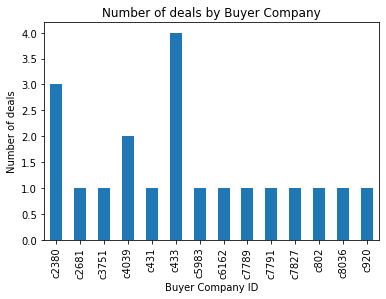

In [16]:
#Compute and visualize the number of deals
number_of_deals.plot.bar()
plt.title('Number of deals by Buyer Company')
plt.xlabel('Buyer Company ID')
plt.ylabel('Number of deals')
plt.show()

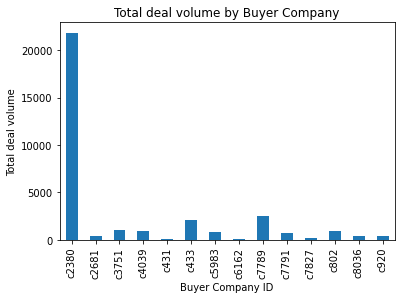

In [17]:
#Compute and visualize the volume of deals
total_deal_volume.plot.bar()
plt.title('Total deal volume by Buyer Company')
plt.xlabel('Buyer Company ID')
plt.ylabel('Total deal volume')
plt.show()

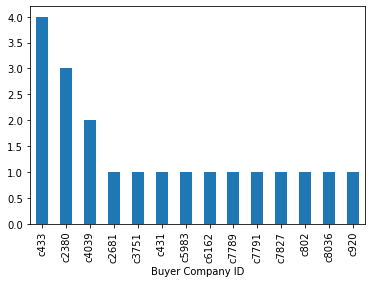

In [18]:
#Visualize the number of deals in descending order
number_of_deals.sort_values(ascending=False).plot.bar()

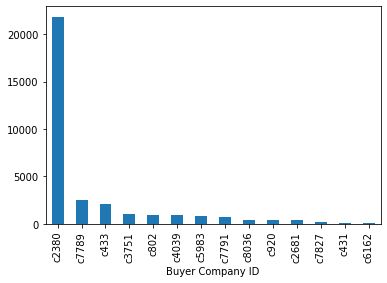

In [20]:
#Visualize the volume of deals in descending order
total_deal_volume.sort_values(ascending=False).plot.bar()

From the graph, we can know that company c433 implemented the most deals while c2380 was the company that had largest volume of transaction

3) What market cap segment should our team focus diligence on to maximize our returns?


In [ ]:
print(data1.dtypes)

To answer this question, the answer depends whether the the company aims to maximize the percentage return or aims to maximize the absolute figure of returns. For instance, if the company could earn $200 by investing in $100, that is a 100% return. On the other hand, if the company could earn $1,500 by investing in $1,000, this is a 50% return, but this investment offers higher return. So we will compute both cases for this question. 

In [21]:
data1['Percentage Increase'] = data1['Market Cap Premium'] / data1['Market Cap Before Announcement ($M)'] * 100

In [22]:
data1.head()

,Company ID,Company Name,Market Cap Before Announcement ($M),Market Cap After Announcement ($M),Market Cap Premium,Market Cap Weight,Weighted Average Premium,Market Cap Category,Percentage Increase
0,c5785,Neuriumlabs,49.6,93.6,44.0,0.000510,0.022425,<200M,88.709677
1,c4888,doxylabs,495.1,936.2,441.1,0.005087,2.244014,200-500M,89.093113
2,c3018,energo,16750.0,32830.0,16080.0,0.172112,2767.556681,5000M+,96.000000
3,c4793,testerlabs,344.4,629.1,284.7,0.003539,1.007503,200-500M,82.665505
4,c9331,Researchlabs,464.7,844.9,380.2,0.004775,1.815434,200-500M,81.816226


In [23]:
#Compute Percentage Increase
data1 = data1.sort_values(by='Percentage Increase', ascending=False)
data1.head()

,Company ID,Company Name,Market Cap Before Announcement ($M),Market Cap After Announcement ($M),Market Cap Premium,Market Cap Weight,Weighted Average Premium,Market Cap Category,Percentage Increase
14,c2185,Zalig,215.5,422.4,206.9,0.002214,0.458146,200-500M,96.009281
2,c3018,energo,16750.0,32830.0,16080.0,0.172112,2767.556681,5000M+,96.000000
19,c2779,VexLabs,482.3,944.3,462.0,0.004956,2.289575,200-500M,95.791001
18,c4593,RixBio,1139.1,2226.7,1087.6,0.011705,12.729951,500-5000M,95.478887
15,c3868,Enfant,206.5,400.0,193.5,0.002122,0.410579,200-500M,93.704600


In [24]:
market_cap_grouped1 = data1.groupby('Market Cap Category')['Percentage Increase'].mean()
market_cap_grouped1

Market Cap Category
<200M        88.528494
200-500M     75.945730
500-5000M    15.985444
5000M+       29.719657
Name: Percentage Increase, dtype: float64

In [25]:
market_cap_describe1 = data1.groupby('Market Cap Category')['Percentage Increase'].describe()
market_cap_describe1

,count,mean,std,min,25%,50%,75%,max
Market Cap Category,,,,,,,,
<200M,7.0,88.528494,1.888786,85.742574,87.626687,88.709677,89.178308,91.637220
200-500M,13.0,75.945730,30.749340,6.166151,82.665505,85.484612,90.439619,96.009281
500-5000M,10.0,15.985444,27.973513,5.058399,6.085376,7.248838,9.004587,95.478887
5000M+,4.0,29.719657,44.188433,7.267799,7.425065,7.805414,30.100006,96.000000


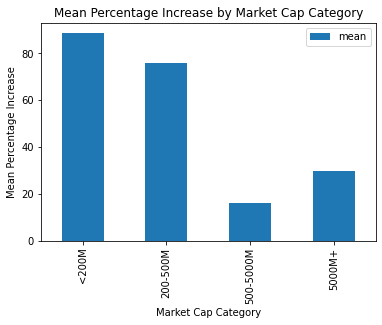

In [26]:
market_cap_describe1.plot.bar(y='mean')
plt.title('Mean Percentage Increase by Market Cap Category')
plt.xlabel('Market Cap Category')
plt.ylabel('Mean Percentage Increase')
plt.show()

From the data, it seems that market cap under 200M brought the largest return in terms of percentage.

In [28]:
#2 Standard for Returns
data1 = data1.sort_values(by='Market Cap Premium', ascending=False)
data1.head()

,Company ID,Company Name,Market Cap Before Announcement ($M),Market Cap After Announcement ($M),Market Cap Premium,Market Cap Weight,Weighted Average Premium,Market Cap Category,Percentage Increase
2,c3018,energo,16750.0,32830.0,16080.0,0.172112,2767.556681,5000M+,96.000000
21,c2380,Reellabs,40030.0,42939.3,2909.3,0.411321,1196.657220,5000M+,7.267799
18,c4593,RixBio,1139.1,2226.7,1087.6,0.011705,12.729951,500-5000M,95.478887
32,c7789,Roshe,7208.6,7794.9,586.3,0.074071,43.427666,5000M+,8.133341
26,c433,CystoSystems,7351.4,7901.1,549.7,0.075538,41.523262,5000M+,7.477487


In [30]:
market_cap_grouped2 = data1.groupby('Market Cap Category')['Market Cap Premium'].mean()
market_cap_grouped2

Market Cap Category
<200M          97.428571
200-500M      270.169231
500-5000M     246.860000
5000M+       5031.325000
Name: Market Cap Premium, dtype: float64

In [32]:
market_cap_describe2 = data1.groupby('Market Cap Category')['Market Cap Premium'].describe()
market_cap_describe2

,count,mean,std,min,25%,50%,75%,max
Market Cap Category,,,,,,,,
<200M,7.0,97.428571,51.954747,43.3,51.200,85.30,145.500,160.0
200-500M,13.0,270.169231,137.361557,23.9,193.500,299.80,341.500,462.0
500-5000M,10.0,246.860000,306.329105,45.8,114.625,140.65,252.575,1087.6
5000M+,4.0,5031.325000,7448.029253,549.7,577.150,1747.80,6201.975,16080.0


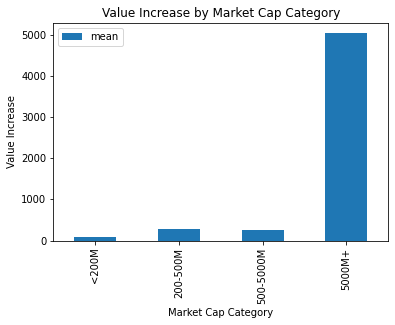

In [34]:
market_cap_describe2.plot.bar(y='mean')
plt.title('Value Increase by Market Cap Category')
plt.xlabel('Market Cap Category')
plt.ylabel('Value Increase')
plt.show()

The data suggests that in terms of absolute figure, market cap with 5B + could bring the largest return if the comapny has enough funds to invest in.

4) What was the weighted average premium paid in 2021 across all market cap segments?


For this question, we will use the data used to answer qestuion # 1

In [53]:
#Index the necessary data from previous datasets.
df1 = df.iloc[:,[1,6,7]]
df1

Company Name  Weighted Average Premium  \
Market Cap Category                                                     
<200M               11             AplitBio                  0.303163   
                    7           KetoSystems                  0.271483   
                    16         EnegizerLabs                  0.211196   
                    8            CogitoLabs                  0.084493   
                    12            MavenLabs                  0.039305   
                    5             oasislabs                  0.022469   
                    0           Neuriumlabs                  0.022425   
200-500M            19              VexLabs                  2.289575   
                    1              doxylabs                  2.244014   
                    4          Researchlabs                  1.815434   
                    9               Exxplor                  1.325008   
                    13         VialumPharma                  1.321783   
                    17    Semicron Sciences                  1.277604   
                    10              DoseBio                  1.093901   
                    3            testerlabs                  1.007503   
                    14                Zalig                  0.458146   
                    6                BluBio                  0.416294   
                    15               Enfant                  0.410579   
                    23  Diamond Biosciences                  0.113595   
                    20           LabSlabBio                  0.095187   
500-5000M           18               RixBio                 12.729951   
                    22                 sola                 12.271189   
                    33            Allergant                 10.495620   
                    30            BioShield                  5.071177   
                    31        GenomeSystems                  3.181639   
                    25         DeltaScience                  2.470872   
                    27             AstroBio                  2.200371   
                    24               Genebi                  1.680017   
                    28                AbbEx                  0.704714   
                    29             NeuroBio                  0.308485   
5000M+              2                energo               2767.556681   
                    21             Reellabs               1196.657220   
                    32                Roshe                 43.427666   
                    26         CystoSystems                 41.523262   

                       Market Cap Category  
Market Cap Category                         
<200M               11               <200M  
                    7                <200M  
                    16               <200M  
                    8                <200M  
                    12               <200M  
                    5                <200M  
                    0                <200M  
200-500M            19            200-500M  
                    1             200-500M  
                    4             200-500M  
                    9             200-500M  
                    13            200-500M  
                    17            200-500M  
                    10            200-500M  
                    3             200-500M  
                    14            200-500M  
                    6             200-500M  
                    15            200-500M  
                    23            200-500M  
                    20            200-500M  
500-5000M           18           500-5000M  
                    22           500-5000M  
                    33           500-5000M  
                    30           500-5000M  
                    31           500-5000M  
                    25           500-5000M  
                    27           500-5000M  
                    24           500-5000M  
                    28           500-5000M  
       

In [63]:
# Reset the index to convert the index to a column
df1 = df1.reset_index(drop=True)

In [68]:
# Sum the weighted average premium per market cap category
sum_premium = df1.groupby('Market Cap Category')['Weighted Average Premium'].sum()
sum_premium

Market Cap Category
<200M           0.954534
200-500M       13.868623
500-5000M      51.114034
5000M+       4049.164829
Name: Weighted Average Premium, dtype: float64

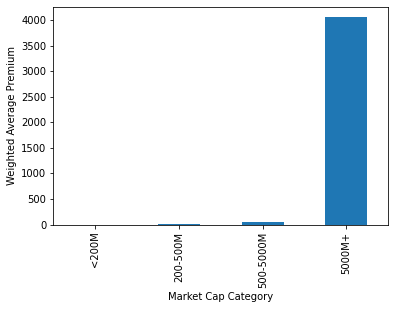

In [70]:
# Plot the data using matplotlib
sum_premium.plot(kind='bar')

# Add x and y labels
plt.xlabel('Market Cap Category')
plt.ylabel('Weighted Average Premium')

# Show the plot
plt.show()

As the data shows, we can see that market cap with 5B+ had the largest weighted average premium. 